In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [3]:
edx_course_descriptions = pd.read_csv('edx_courses.csv')
edx_course_descriptions.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",NaN,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part two of the MathTrackX XSer...,NaN,https://www.edx.org/course/mathtrackx-special-...


In [4]:
edx_user_data = pd.read_csv('EDX_1_2016.csv')
edx_user_data.head(3)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,9/5/12,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,9/26/12,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/9/12,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76


In [5]:
edx_course_descriptions.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

In [6]:
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].str.replace(',','')
edx_course_descriptions['price'] = edx_course_descriptions['price'].str.replace('FREE-Add a Verified Certificate for', '')
edx_course_descriptions['price'] = edx_course_descriptions['price'].str.replace('$', '')
edx_course_descriptions['price'] = edx_course_descriptions['price'].str.replace('USD', '')
edx_course_descriptions['course_length'] = edx_course_descriptions['course_length'].str.replace('Weeks', '')

In [7]:
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].fillna(0)

In [8]:
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].astype(int)

In [9]:
edx_course_descriptions['price'] = edx_course_descriptions['price'].astype(float)

In [10]:
edx_course_descriptions['course_length'] = edx_course_descriptions['course_length'].astype(int)

In [11]:
edx_course_descriptions.isna().sum()

title                   0
summary                53
n_enrolled              0
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [17]:
edx_course_descriptions['summary'] = edx_course_descriptions['summary'].fillna('Unlisted')

In [18]:
edx_course_descriptions['instructors'] = edx_course_descriptions['instructors'].fillna('Unlisted')

In [19]:
edx_course_descriptions['subtitles'] = edx_course_descriptions['subtitles'].fillna('English')

In [20]:
edx_course_descriptions['course_description'] = edx_course_descriptions['course_description'].fillna('Unlisted')

In [21]:
edx_course_descriptions['course_syllabus'] = edx_course_descriptions['course_syllabus'].fillna('Unlisted')

In [22]:
edx_course_descriptions.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",0,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4,79.0,This course is part two of the MathTrackX XSer...,Unlisted,https://www.edx.org/course/mathtrackx-special-...


In [23]:
del edx_course_descriptions['course_url']

In [24]:
edx_course_descriptions.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",0,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4,79.0,This course is part two of the MathTrackX XSer...,Unlisted


In [25]:
edx_course_descriptions['Level'] = edx_course_descriptions['Level'].astype('category')

In [26]:
edx_course_descriptions['Level'] = edx_course_descriptions['Level'].cat.codes

In [27]:
edx_course_descriptions['course_type'] = edx_course_descriptions['course_type'].astype('category')
edx_course_descriptions['course_type'] = edx_course_descriptions['course_type'].cat.codes

In [28]:
edx_course_descriptions.dtypes

title                  object
summary                object
n_enrolled              int64
course_type              int8
institution            object
instructors            object
Level                    int8
subject                object
language               object
subtitles              object
course_effort          object
course_length           int64
price                 float64
course_description     object
course_syllabus        object
dtype: object

In [29]:
edx_user_data['Launch Date'] = pd.to_datetime(edx_user_data['Launch Date'])

In [30]:
edx_course_descriptions.describe()

,n_enrolled,course_type,Level,course_length,price
count,9.750000e+02,975.000000,975.000000,975.000000,975.000000
mean,4.670523e+04,0.940513,1.547692,6.705641,100.465497
std,1.128239e+05,0.236656,0.653165,3.150327,69.572175
min,0.000000e+00,0.000000,0.000000,1.000000,5.000000
25%,8.529500e+03,1.000000,1.000000,4.000000,49.000000
50%,1.968700e+04,1.000000,2.000000,6.000000,79.000000
75%,4.891850e+04,1.000000,2.000000,8.000000,149.000000
max,2.442271e+06,1.000000,2.000000,18.000000,450.000000


In [31]:
edx_course_descriptions['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Energy & Earth Sciences           8
Design                            8
Music                             7
Electronics                       7
Food & Nutrition                  6
Philosophy & Ethics               6
Architecture                      5
Chemistry                   

In [33]:
edx_course_description_csv = edx_course_descriptions.to_csv("edx_course_description_for_bq.csv")

In [85]:
Path('edx_course_descriptions.db').touch()
edx_conn = sqlite3.connect('edx_course_descriptions.db')
edx_cursor = edx_conn.cursor()

In [86]:
edx_course_descriptions.to_sql('edx_course_descriptions', edx_conn, if_exists='append', index=False)

In [90]:
edx_description_init_query = pd.read_sql(''' SELECT * FROM edx_course_descriptions ''', edx_conn)
edx_description_init_query

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
0,How to Learn Online,Learn essential strategies for successful onli...,124980,1,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,2,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,1,The University of Michigan,Charles Severance,2,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,0,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,1,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",Unlisted
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,1,"University of California, Berkeley",Stephan Sorger,2,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,Unlisted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,1,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,1,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,Unlisted
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,1,Tsinghua University,Yuehua Nie,2,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,Unlisted
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,1,École polytechnique fédérale de Lausanne,Wulfram Gerstner,0,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,1,SDG Academy,Jeffrey D. Sachs,2,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...


In [114]:
data_analysis_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution 
                                      FROM edx_course_descriptions
                                      WHERE subject == 'Data Analysis & Statistics'
                                      ORDER BY price DESC LIMIT 15 ''', edx_conn)
data_analysis_query

,title,price,course_effort,n_enrolled,institution
0,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
1,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
2,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
3,Probability - The Science of Uncertainty and Data,300.0,10–14 hours per week,205615,Massachusetts Institute of Technology
4,Statistics and R,249.0,2–4 hours per week,314586,Harvard University
5,Data Analytics and Visualization in Health Care,249.0,8–10 hours per week,7304,Rochester Institute of Technology
6,The Analytics Edge,199.0,10–15 hours per week,129555,Massachusetts Institute of Technology
7,"Data Science for Construction, Architecture an...",199.0,4–6 hours per week,11113,The National University of Singapore
8,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
9,Image Processing and Analysis for Life Scientists,199.0,2–3 hours per week,8621,École polytechnique fédérale de Lausanne


<AxesSubplot:xlabel='price', ylabel='title'>

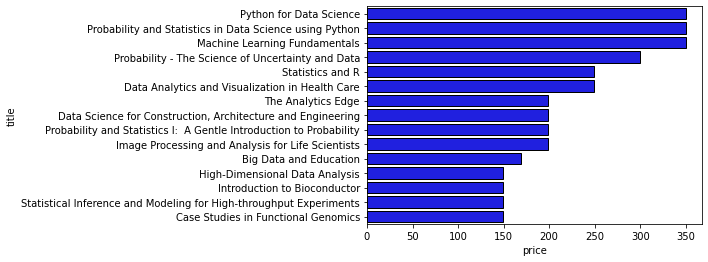

In [108]:
sns.barplot(x = 'price', y = 'title', data = data_analysis_query, color = 'blue', edgecolor='black')

<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

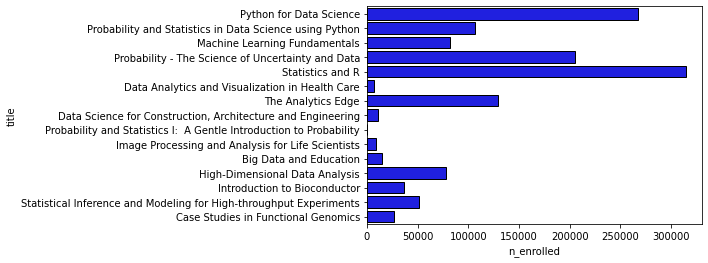

In [115]:
sns.barplot(x = 'n_enrolled', y = 'title', data = data_analysis_query, color = 'blue', edgecolor='black')

<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

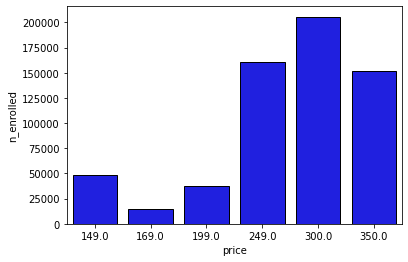

In [120]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_query, color = 'blue', edgecolor = 'black', ci=False)

In [121]:
data_analysis_query.mean()

price           227.266667
n_enrolled    89348.533333
dtype: float64

In [123]:
data_analysis_python = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx_course_descriptions
                                       WHERE title LIKE '%Python'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_python

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
1,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
2,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
3,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"
4,Estructuras de Datos con Python,49.0,2–4 hours per week,0,The University of Michigan
5,Advanced Algorithmics and Graph Theory with Py...,49.0,2–4 hours per week,13502,IMT
6,Analyzing Data with Python,39.0,2–4 hours per week,94079,IBM
7,Visualizing Data with Python,39.0,2–4 hours per week,42101,IBM


<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

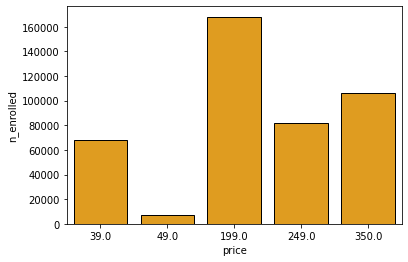

In [125]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_python, color = 'orange', edgecolor='black', ci=False)

In [130]:
data_analysis_prog = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx_course_descriptions
                                       WHERE title LIKE '%Programming'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_prog

,title,price,course_effort,n_enrolled,institution
0,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
1,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
2,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
3,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM


In [135]:
data_analysis_stat = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_course_descriptions
                                     WHERE title LIKE '%Statistics'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_stat

,title,price,course_effort,n_enrolled,institution
0,BioStatistics,79.0,5–10 hours per week,14937,Doane University
1,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
2,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
3,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund


In [138]:
data_analysis_prob = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_course_descriptions
                                     WHERE title LIKE '%Probability' AND title NOT LIKE '%MathTrackX: Probability'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_prob

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
1,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
2,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
3,Data Science: Probability,49.0,1–2 hours per week,135859,Harvard University


In [140]:
comp_sci_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                 FROM edx_course_descriptions WHERE subject == 'Computer Science'
                                 ORDER BY price DESC LIMIT 15 ''', edx_conn)
comp_sci_query

,title,price,course_effort,n_enrolled,institution
0,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
1,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
2,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
3,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University
4,Scripting and Programming Foundations,299.7,9–10 hours per week,0,Western Governors University
5,Cloud Computing for Enterprises,299.0,8–10 hours per week,27241,University System of Maryland-University of Ma...
6,Marketing Analytics: Marketing Measurement Str...,249.0,5–7 hours per week,81140,"University of California, Berkeley"
7,Marketing Analytics: Competitive Analysis and ...,249.0,5–7 hours per week,70682,"University of California, Berkeley"
8,Artificial Intelligence (AI),249.0,8–10 hours per week,265104,Columbia University
9,Machine Learning,249.0,8–10 hours per week,150855,Columbia University


<AxesSubplot:xlabel='price', ylabel='title'>

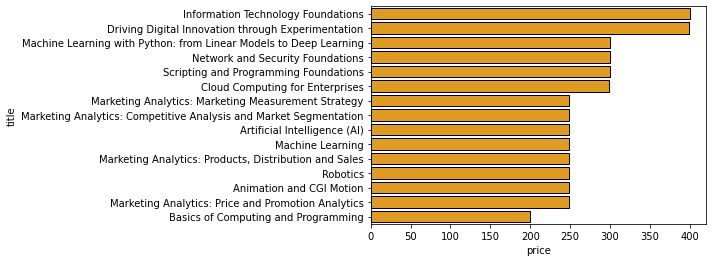

In [141]:
sns.barplot(x = 'price', y = 'title', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

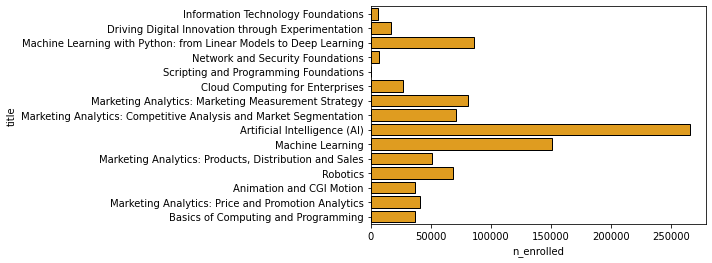

In [142]:
sns.barplot(x = 'n_enrolled', y = 'title', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

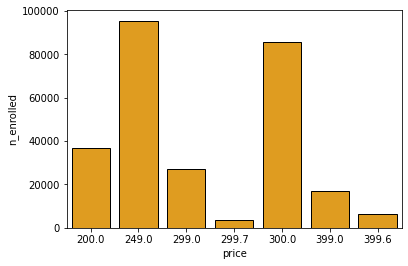

In [144]:
sns.barplot(x = 'price', y = 'n_enrolled', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

In [161]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM edx_course_descriptions 
                                    WHERE subject == 'Data Analysis & Statistics'
                                    ORDER BY price DESC ''', edx_conn)
data_analysis_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,4264412,72,92.63875,25.0,350.0


In [160]:
comp_sci_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Computer Science'
                               ORDER BY price DESC ''', edx_conn)
comp_sci_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,12447737,166,125.012048,49.0,399.6


In [151]:
edx_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_edx_enrollment, COUNT(title) AS total_courses, AVG(price) AS total_avg
                          FROM edx_course_descriptions
                          ORDER BY price DESC ''', edx_conn)
edx_tot

,total_edx_enrollment,total_courses,total_avg
0,45537600,975,100.465497


In [159]:
business_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase 
                               FROM edx_course_descriptions
                               WHERE subject == 'Business & Management'
                               ORDER BY price DESC ''', edx_conn)
business_tot

,total_business_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,7076563,164,132.542683,5.0,399.0


In [162]:
engineering_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_engineering_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Engineering'
                               ORDER BY price DESC ''', edx_conn)
engineering_tot

,total_engineering_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,1396839,58,116.982759,25.0,299.0


In [163]:
ed_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_education_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Education & Teacher Training'
                               ORDER BY price DESC ''', edx_conn)
ed_tot

,total_education_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,706532,29,83.068966,25.0,299.0


In [164]:
law_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_law_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Law'
                               ORDER BY price DESC ''', edx_conn)
law_tot

,total_law_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,291436,10,112.0,25.0,199.0


In [166]:
econ_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_economics_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Economics & Finance'
                               ORDER BY price DESC ''', edx_conn)
econ_tot

,total_economics_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,835907,46,75.649565,5.0,450.0


In [169]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM edx_course_descriptions) AS subject_pct
                             FROM edx_course_descriptions
                             GROUP BY subject
                             ORDER BY subject_pct DESC LIMIT 10''', edx_conn)
by_subject

,subject,subject_count,subject_pct
0,Computer Science,166,17
1,Business & Management,164,16
2,Data Analysis & Statistics,72,7
3,Humanities,64,6
4,Social Sciences,51,5
5,Engineering,58,5
6,Economics & Finance,46,4
7,Communication,39,4
8,Medicine,31,3
9,Math,31,3


In [320]:
by_subject_csv = by_subject.to_csv('by_subject_csv.csv')

<AxesSubplot:xlabel='subject_pct', ylabel='subject'>

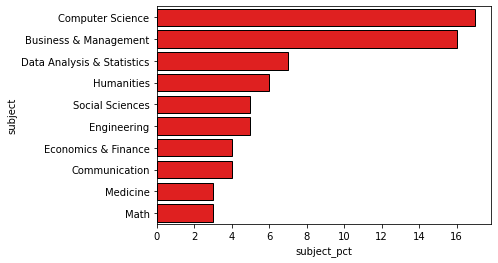

In [170]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject, color = 'red', edgecolor='black', ci=False)

In [323]:
edx_by_price = pd.read_sql(''' SELECT price, COUNT(price) AS price_count,
                           100 * COUNT(price) / (SELECT COUNT(*) FROM edx_course_descriptions) AS price_pct
                           FROM edx_course_descriptions
                           GROUP BY price
                           ORDER BY price_pct DESC LIMIT 10 ''', edx_conn)
edx_by_price

,price,price_count,price_pct
0,49.0,270,27
1,99.0,137,14
2,50.0,96,9
3,199.0,85,8
4,149.0,78,8
5,25.0,49,5
6,150.0,30,3
7,139.0,33,3
8,249.0,26,2
9,79.0,21,2


In [324]:
edx_price_pct_csv = edx_by_price.to_csv('edx_price_pct.csv')

<AxesSubplot:xlabel='price', ylabel='price_pct'>

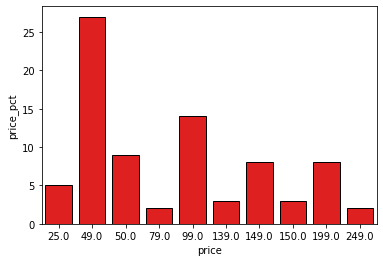

In [174]:
sns.barplot(x = 'price', y = 'price_pct', data = by_price, color = 'red', edgecolor='black', ci=False)

In [177]:
by_course_effort = pd.read_sql(''' SELECT course_effort, COUNT(course_effort) AS num_hours, 
                                   100 * COUNT(course_effort) / (SELECT COUNT(*) FROM edx_course_descriptions) AS hours_pct
                                   FROM edx_course_descriptions 
                                   GROUP BY course_effort
                                   ORDER BY hours_pct DESC LIMIT 10 ''', edx_conn)
by_course_effort

,course_effort,num_hours,hours_pct
0,2–4 hours per week,108,11
1,3–5 hours per week,103,10
2,2–3 hours per week,104,10
3,3–4 hours per week,91,9
4,4–6 hours per week,79,8
5,8–10 hours per week,57,5
6,6–8 hours per week,51,5
7,4–5 hours per week,55,5
8,1–2 hours per week,55,5
9,5–7 hours per week,28,2


<AxesSubplot:xlabel='hours_pct', ylabel='course_effort'>

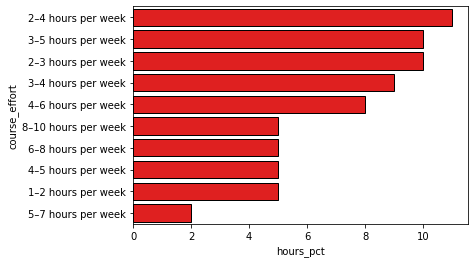

In [178]:
sns.barplot(x = 'hours_pct', y = 'course_effort', data = by_course_effort, color = 'red', edgecolor='black', ci=False)

In [184]:
by_institution = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 GROUP BY institution
                                 ORDER BY institution_pct DESC LIMIT 10''', edx_conn)
by_institution

,institution,institution_count,institution_pct
0,Harvard University,104,10
1,Universitat Politècnica de Valencia,47,4
2,Massachusetts Institute of Technology,41,4
3,IBM,30,3
4,Delft University of Technology,30,3
5,"University of California, Berkeley",20,2
6,The University of Queensland,26,2
7,The University of Michigan,22,2
8,Tecnológico de Monterrey,21,2
9,Stanford University,20,2


<AxesSubplot:xlabel='institution_pct', ylabel='institution'>

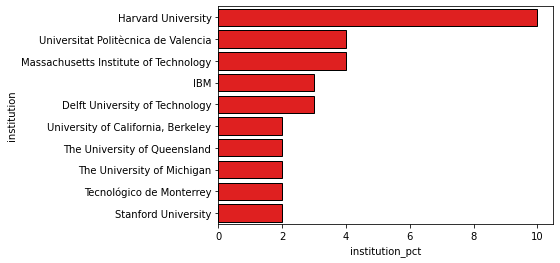

In [185]:
sns.barplot(x = 'institution_pct', y = 'institution', data = by_institution, color = 'red', edgecolor='black', ci=False)

In [192]:
by_institution_dsc = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 WHERe subject == 'Data Analysis & Statistics'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_dsc 

,institution,institution_count,institution_pct
0,IBM,20,2
1,Harvard University,18,1
2,Universidad Galileo,4,0
3,Tecnológico de Monterrey,4,0
4,Rolls-Royce,4,0
5,"The University of California, San Diego",3,0
6,Universitat Politècnica de Valencia,2,0
7,Massachusetts Institute of Technology,2,0
8,Inter-American Development Bank,2,0
9,École polytechnique fédérale de Lausanne,1,0


<AxesSubplot:xlabel='institution_count', ylabel='institution'>

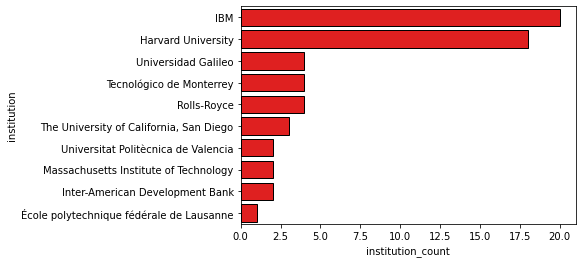

In [193]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_dsc, color = 'red', edgecolor='black', ci=False)

In [190]:
by_institution_comp_sci = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 WHERe subject == 'Computer Science'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_comp_sci 

,institution,institution_count,institution_pct
0,Universitat Politècnica de Valencia,13,1
1,IBM,10,1
2,"University of California, Berkeley",8,0
3,The Linux Foundation,8,0
4,Stanford University,8,0
5,Harvard University,8,0
6,Columbia University,7,0
7,Amazon Web Services,7,0
8,Dartmouth_IMTx-Dartmouth College-IMT,6,0
9,Curtin University,6,0


<AxesSubplot:xlabel='institution_count', ylabel='institution'>

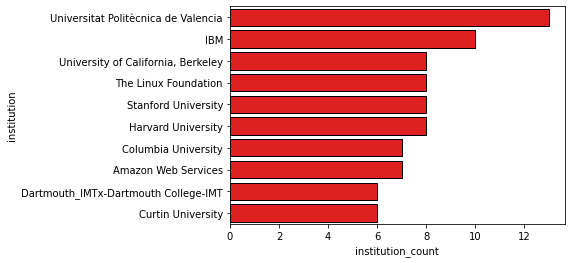

In [191]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_comp_sci, color = 'red', edgecolor='black', ci=False)

In [198]:
subject_hundred = pd.read_sql(''' SELECT subject, AVG(price) as avg_price_subject
                                  FROM edx_course_descriptions
                                  WHERE price > 100.0 
                                  GROUP BY subject
                                  ORDER BY avg_price_subject DESC LIMIT 10''', edx_conn)
subject_hundred = subject_hundred.round(2)
subject_hundred

,subject,avg_price_subject
0,Education & Teacher Training,227.00
1,Data Analysis & Statistics,222.38
2,Economics & Finance,213.56
3,Chemistry,199.00
4,Engineering,192.96
5,Computer Science,189.61
6,Environmental Studies,189.00
7,Design,189.00
8,Art & Culture,185.00
9,Business & Management,183.19


<AxesSubplot:xlabel='avg_price_subject', ylabel='subject'>

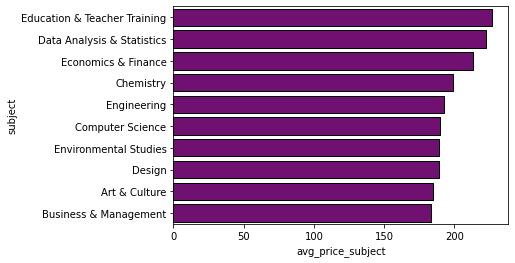

In [199]:
sns.barplot(x = 'avg_price_subject', y = 'subject', data = subject_hundred, color = 'purple', edgecolor='black', ci=False)

In [203]:
by_enroll = pd.read_sql(''' SELECT subject, SUM(n_enrolled) AS total_enrollment
                          FROM edx_course_descriptions 
                          GROUP BY subject
                          ORDER BY total_enrollment DESC LIMIT 10 ''', edx_conn)
by_enroll

,subject,total_enrollment
0,Computer Science,12447737
1,Business & Management,7076563
2,Communication,4641327
3,Data Analysis & Statistics,4264412
4,Humanities,3504140
5,Social Sciences,1844379
6,Biology & Life Sciences,1763832
7,Engineering,1396839
8,Language,1063257
9,Medicine,989765


In [321]:
by_enroll_csv = by_enroll.to_csv('by_enroll.csv')

<AxesSubplot:xlabel='total_enrollment', ylabel='subject'>

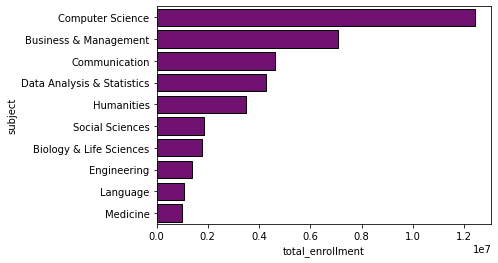

In [204]:
sns.barplot(x = 'total_enrollment', y = 'subject', data = by_enroll, color = 'purple', edgecolor='black', ci=False)

In [205]:
by_avg_enroll = pd.read_sql(''' SELECT subject, AVG(n_enrolled) AS avg_enrollment
                          FROM edx_course_descriptions 
                          GROUP BY subject
                          ORDER BY avg_enrollment DESC LIMIT 10 ''', edx_conn)
by_avg_enroll

,subject,avg_enrollment
0,Communication,119008.384615
1,Architecture,91322.200000
2,Computer Science,74986.367470
3,Data Analysis & Statistics,59227.944444
4,Humanities,54752.187500
5,Biology & Life Sciences,50395.200000
6,Literature,47898.000000
7,Business & Management,43149.774390
8,Chemistry,39507.000000
9,Social Sciences,36164.294118


<AxesSubplot:xlabel='avg_enrollment', ylabel='subject'>

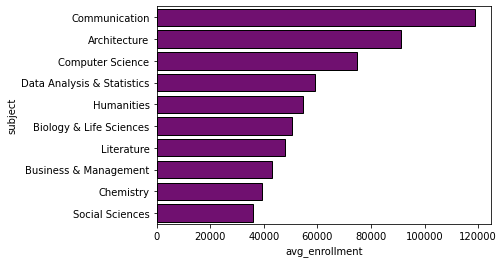

In [206]:
sns.barplot(x = 'avg_enrollment', y = 'subject', data = by_avg_enroll, color = 'purple', edgecolor='black', ci=False)

In [208]:
Path('edx_behavior.db').touch()
edx_behavior_conn = sqlite3.connect('edx_behavior.db')
edx_behavior_cursor = edx_conn.cursor()

In [209]:
edx_user_data.to_sql('edx_behavior', edx_behavior_conn, if_exists='append', index=False)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [214]:
edx_user_data_init_query = pd.read_sql(''' SELECT * FROM edx_behavior LIMIT 5 ''', edx_behavior_conn)
edx_user_data_init_query

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,2012-09-05 00:00:00,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,2012-09-26 00:00:00,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-10-09 00:00:00,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,2012-10-15 00:00:00,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,2012-10-15 00:00:00,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [216]:
by_course_subject = pd.read_sql(''' SELECT `Course Subject`, COUNT(`Course Subject`) AS course_subject_count, 
                                    100 * COUNT(`Course Subject`) / (SELECT COUNT(*) FROM edx_behavior) AS subject_pct
                                    FROM edx_behavior
                                    GROUP BY `Course Subject`
                                    ORDER BY subject_pct DESC ''', edx_behavior_conn)
by_course_subject

,Course Subject,course_subject_count,subject_pct
0,"Humanities, History, Design, Religion, and Edu...",94,32
1,"Science, Technology, Engineering, and Mathematics",91,31
2,"Government, Health, and Social Science",75,25
3,Computer Science,30,10


<AxesSubplot:xlabel='subject_pct', ylabel='Course Subject'>

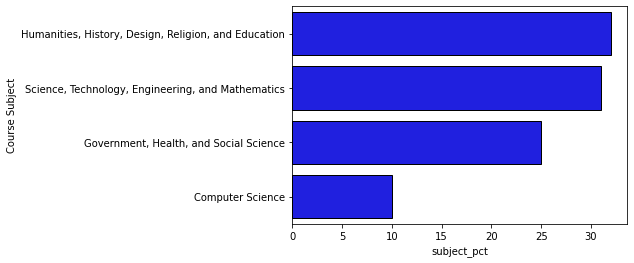

In [218]:
sns.barplot(x = 'subject_pct', y = 'Course Subject', data = by_course_subject, color = 'blue', edgecolor='black', ci=False)

In [248]:
udemy = pd.read_csv('udemy_courses.csv')
udemy

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [249]:
del udemy['course_id']
del udemy['url']

In [251]:
udemy.dtypes

course_title            object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [266]:
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])

In [253]:
udemy['level'] = udemy['level'].astype('category')

In [254]:
udemy['level'] = udemy['level'].cat.codes

In [256]:
udemy['is_paid'] = udemy['is_paid'].astype('category')

In [257]:
udemy['is_paid'] = udemy['is_paid'].cat.codes

In [267]:
udemy

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,Learn and Build using Polymer,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [268]:
Path('udemy_updated.db').touch()
udemy_conn = sqlite3.connect('udemy_updated.db')
udemy_cursor = udemy_conn.cursor()

In [269]:
udemy.to_sql('udemy_updated', udemy_conn, if_exists='append', index=False)

In [270]:
udemy_init_query = pd.read_sql(''' SELECT * FROM udemy_updated ''', udemy_conn)
udemy_init_query

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,Learn and Build using Polymer,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [264]:
udemy_init_query['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [272]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM udemy_updated) AS subject_pct
                             FROM udemy_updated
                             GROUP BY subject
                             ORDER BY subject_pct DESC ''', udemy_conn)
by_subject

,subject,subject_count,subject_pct
0,Web Development,1200,32
1,Business Finance,1195,32
2,Musical Instruments,680,18
3,Graphic Design,603,16


<AxesSubplot:xlabel='subject_pct', ylabel='subject'>

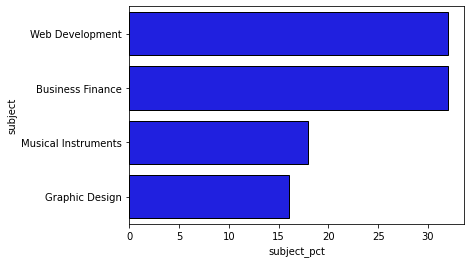

In [275]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject, color = 'blue', edgecolor = 'black', ci=False)

In [277]:
by_price = pd.read_sql(''' SELECT price, COUNT(price) AS subject_count,
                             100 * COUNT(price) / (SELECT COUNT(*) FROM udemy_updated) AS price_pct
                             FROM udemy_updated
                             GROUP BY price
                             ORDER BY price_pct DESC LIMIT 10 ''', udemy_conn)
by_price

,price,subject_count,price_pct
0,20,830,22
1,50,468,12
2,200,295,8
3,0,310,8
4,40,217,5
5,95,152,4
6,30,166,4
7,25,154,4
8,195,127,3
9,100,133,3


<AxesSubplot:xlabel='price', ylabel='price_pct'>

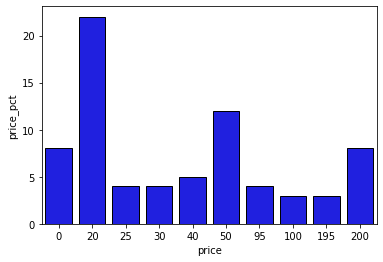

In [279]:
sns.barplot(x = 'price', y = 'price_pct', data = by_price, color = 'blue', edgecolor = 'black', ci=False)

In [338]:
by_price['price'] = by_price['price'].astype(str)

In [339]:
by_price.dtypes

price            object
subject_count     int64
price_pct         int64
dtype: object

In [340]:
udemy_by_price_csv = by_price.to_csv('udemy_by_price.csv')
udemy_by_price_csv

In [283]:
by_subs_subject = pd.read_sql(''' SELECT course_title, subject, num_subscribers FROM udemy_updated
                          GROUP BY subject
                          ORDER BY num_subscribers DESC ''', udemy_conn)

by_subs_subject

,course_title,subject,num_subscribers
0,Learn Web Designing & HTML5/CSS3 Essentials in...,Web Development,43285
1,"7 Ways A Beginner Guitarist Can Sound Better, ...",Musical Instruments,4529
2,Anatomy and Figure Drawing for Beginners,Graphic Design,2252
3,Ultimate Investment Banking Course,Business Finance,2147


In [327]:
udemy_by_subs = pd.read_sql(''' SELECT course_title, subject, num_subscribers FROM udemy_updated
                          ORDER BY num_subscribers DESC LIMIT 10 ''', udemy_conn)
udemy_by_subs

,course_title,subject,num_subscribers
0,Learn HTML5 Programming From Scratch,Web Development,268923
1,Coding for Entrepreneurs Basic,Web Development,161029
2,The Web Developer Bootcamp,Web Development,121584
3,Build Your First Website in 1 Week with HTML5 ...,Web Development,120291
4,The Complete Web Developer Course 2.0,Web Development,114512
5,Free Beginner Electric Guitar Lessons,Musical Instruments,101154
6,Web Design for Web Developers: Build Beautiful...,Web Development,98867
7,Learn Javascript & JQuery From Scratch,Web Development,84897
8,Practical PHP: Master the Basics and Code Dyna...,Web Development,83737
9,JavaScript: Understanding the Weird Parts,Web Development,79612


<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

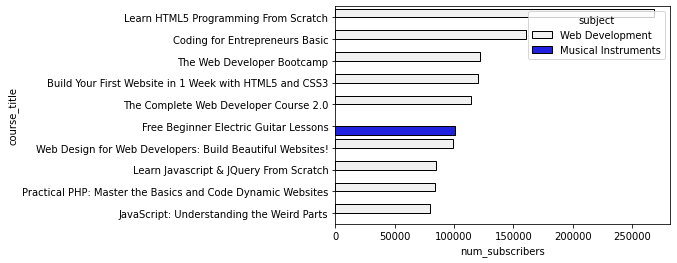

In [289]:
sns.barplot(x = 'num_subscribers', y = 'course_title', hue = 'subject', data = udemy_by_subs, color = 'blue', edgecolor='black', ci=False)

In [328]:
udemy_by_subs_csv = udemy_by_subs.to_csv('udemy_by_subs.csv')

In [292]:
by_reviews = pd.read_sql(''' SELECT course_title, subject, num_reviews
                             FROM udemy_updated
                             ORDER BY num_reviews DESC LIMIT 10''', udemy_conn)
by_reviews 

,course_title,subject,num_reviews
0,The Web Developer Bootcamp,Web Development,27445
1,The Complete Web Developer Course 2.0,Web Development,22412
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,19649
3,JavaScript: Understanding the Weird Parts,Web Development,16976
4,Modern React with Redux,Web Development,15117
5,Learn and Understand AngularJS,Web Development,11580
6,Learn and Understand NodeJS,Web Development,11123
7,Learn HTML5 Programming From Scratch,Web Development,8629
8,Angular 2 with TypeScript for Beginners: The P...,Web Development,8341
9,Pianoforall - Incredible New Way To Learn Pian...,Musical Instruments,7676


<AxesSubplot:xlabel='num_reviews', ylabel='course_title'>

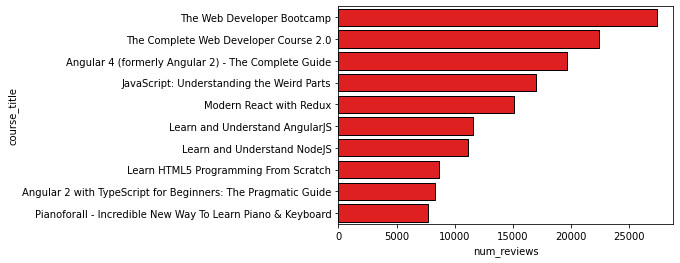

In [293]:
sns.barplot(x = 'num_reviews', y = 'course_title', data = by_reviews, color = 'red', edgecolor = 'black', ci=False)

In [295]:
reviews_lec = pd.read_sql(''' SELECT course_title, subject, num_lectures, num_reviews
                             FROM udemy_updated
                             ORDER BY num_reviews DESC''', udemy_conn)
reviews_lec

,course_title,subject,num_lectures,num_reviews
0,The Web Developer Bootcamp,Web Development,342,27445
1,The Complete Web Developer Course 2.0,Web Development,304,22412
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649
3,JavaScript: Understanding the Weird Parts,Web Development,85,16976
4,Modern React with Redux,Web Development,150,15117
...,...,...,...,...
3673,Effective Personal Website Building and Hosting,Web Development,11,0
3674,Angular 4 Front To Back,Web Development,68,0
3675,XSD :basics for beginners,Web Development,7,0
3676,AppML :basics for beginners,Web Development,8,0


In [297]:
reviews_lec.dtypes

course_title    object
subject         object
num_lectures     int64
num_reviews      int64
dtype: object

<AxesSubplot:xlabel='num_lectures', ylabel='num_reviews'>

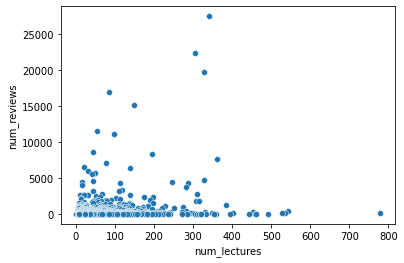

In [298]:
sns.scatterplot(x = 'num_lectures', y = 'num_reviews', data = reviews_lec)

In [329]:
reviews_lec.dtypes

course_title    object
subject         object
num_lectures     int64
num_reviews      int64
dtype: object

In [304]:
reviews_duration = pd.read_sql(''' SELECT course_title, subject, num_lectures, num_reviews, content_duration, price
                             FROM udemy_updated
                             ORDER BY num_reviews DESC''', udemy_conn)
reviews_duration

,course_title,subject,num_lectures,num_reviews,content_duration,price
0,The Web Developer Bootcamp,Web Development,342,27445,43.000000,200
1,The Complete Web Developer Course 2.0,Web Development,304,22412,30.500000,200
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649,22.000000,190
3,JavaScript: Understanding the Weird Parts,Web Development,85,16976,11.500000,175
4,Modern React with Redux,Web Development,150,15117,26.500000,180
...,...,...,...,...,...,...
3673,Effective Personal Website Building and Hosting,Web Development,11,0,1.000000,20
3674,Angular 4 Front To Back,Web Development,68,0,8.500000,40
3675,XSD :basics for beginners,Web Development,7,0,0.700000,35
3676,AppML :basics for beginners,Web Development,8,0,0.633333,30


<AxesSubplot:xlabel='content_duration', ylabel='num_reviews'>

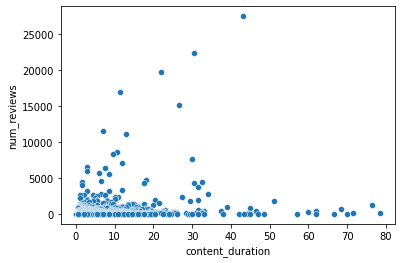

In [306]:
sns.scatterplot(x = 'content_duration', y = 'num_reviews', data = reviews_duration)

In [325]:
reviews_duration_csv = reviews_duration.to_csv('udemy_reviews_duration.csv')

In [310]:
total_enrollment_biz_web = pd.read_sql(''' SELECT subject, num_subscribers, SUM(num_subscribers) AS sum_sub, AVG(price) AS avg_course_price
                                           FROM udemy_updated
                                           GROUP BY subject
                                           ORDER BY sum_sub DESC ''', udemy_conn)
total_enrollment_biz_web

,subject,num_subscribers,sum_sub,avg_course_price
0,Web Development,43285,7980572,77.033333
1,Business Finance,2147,1868711,68.552301
2,Graphic Design,2252,1063148,57.827529
3,Musical Instruments,4529,846689,49.558824


In [312]:
tot_price = pd.read_sql(''' SELECT subject, num_subscribers, SUM(num_subscribers) AS sum_sub, AVG(price) AS avg_course_price, SUM(price) AS total_revenue
                                           FROM udemy_updated
                                           GROUP BY subject
                                           ORDER BY sum_sub DESC ''', udemy_conn)
tot_price

,subject,num_subscribers,sum_sub,avg_course_price,total_revenue
0,Web Development,43285,7980572,77.033333,92440
1,Business Finance,2147,1868711,68.552301,81920
2,Graphic Design,2252,1063148,57.827529,34870
3,Musical Instruments,4529,846689,49.558824,33700


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Web Development'),
  Text(1, 0, 'Business Finance'),
  Text(2, 0, 'Graphic Design'),
  Text(3, 0, 'Musical Instruments')])

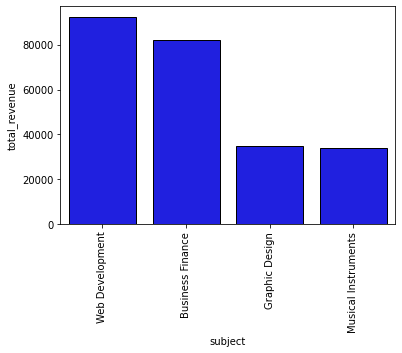

In [316]:
sns.barplot(x = 'subject', y = 'total_revenue', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Web Development'),
  Text(1, 0, 'Business Finance'),
  Text(2, 0, 'Graphic Design'),
  Text(3, 0, 'Musical Instruments')])

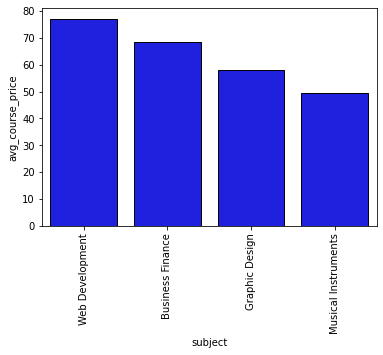

In [317]:
sns.barplot(x = 'subject', y = 'avg_course_price', data = tot_price, color = 'blue', edgecolor = 'black', ci = False)
plt.xticks(rotation=90)

In [326]:
udemy_tot_price = tot_price.to_csv('udemy_avg_price.csv')

In [331]:
udemy_search = pd.read_csv('udemy_timeline.csv', skiprows=2)
udemy_search

,Week,EDX: (United States),Udemy: (United States),Coursera: (United States)
0,8/14/16,19,29,34
1,8/21/16,21,33,37
2,8/28/16,18,40,39
3,9/4/16,15,27,39
4,9/11/16,20,27,39
...,...,...,...,...
256,7/11/21,7,60,34
257,7/18/21,14,59,41
258,7/25/21,12,67,38
259,8/1/21,11,57,36


In [332]:
udemy_search['Week'] = pd.to_datetime(udemy_search['Week'])

In [334]:
udemy_search_csv = udemy_search.to_csv('udemy_search.csv')